# RANDOM SELECTION - RASTGELE DAĞILIM YAPMASI- EŞİT DAĞITIR

In [87]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
import math

In [88]:
df = pd.read_csv("Ads_CTR_Optimisation.csv")

In [89]:
df.shape

(10000, 10)

In [90]:
N = 10000
d=10
toplam=0
secilenler = list()

In [91]:
for n in range(0,N):
    ad = random.randrange(d)
    secilenler.append(ad)
    odul = df.values[n,ad]
    toplam = toplam+odul

In [92]:
print(secilenler[0:10])
print(toplam)

[3, 4, 5, 6, 9, 3, 3, 9, 0, 3]
1273


([<matplotlib.axis.XTick at 0x19804973c10>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9')])

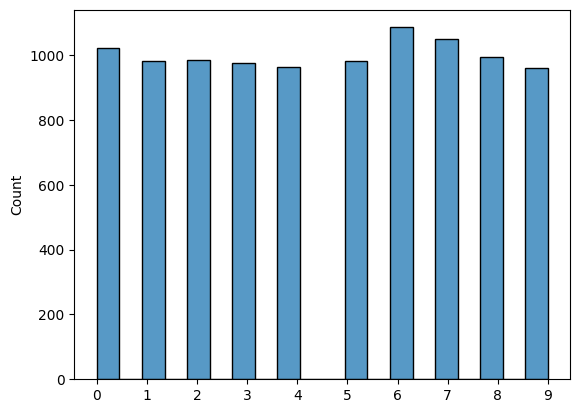

In [93]:
sns.histplot(secilenler)
plt.xticks(range(0,10))

# UPPER CONFIDENCE BOUND- GEÇMİŞTEN GELECEĞE SEÇİM DEĞİŞİR

In [94]:
N = 10000
d=10
toplam=0
oduller =[0]*d
tiklamalar = [0] *d
secilenler = list()

In [95]:
for n in range(0,N):
    ad = 0
    max_ucb = 0

    for i in range(0,d):
        if(tiklamalar[i] > 0):
            ortalama = oduller[i] / tiklamalar[i]
            delta = math.sqrt(3/2*math.log(n)/tiklamalar[i])
            ucb = ortalama+delta
        else:
            ucb=N*10
        if max_ucb < ucb:
            max_ucb = ucb
            ad = i
    secilenler.append(ad)   
    tiklamalar[ad] = tiklamalar[ad]+1 
    odul = df.values[n,ad]
    oduller[ad] = oduller[ad] + odul
    toplam = toplam+odul
   

In [96]:
print("Toplam Ödül")
print(toplam)

Toplam Ödül
2211


<Axes: ylabel='Count'>

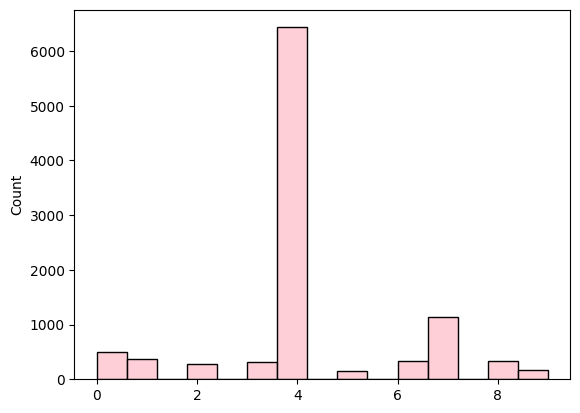

In [100]:
sns.histplot(secilenler,color="pink")